In [3]:
import sys
sys.path.append("/u/lukas.rilling/dev/")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
%matplotlib widget

from returnn_training_progress import get_epoch_data
from returnn_training_plot_nb import plot_df
%load_ext autoreload
%autoreload 2

In [5]:
globs = [
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS*/enc768/400ep/dec_drop_0.05/training",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS/enc768/400ep/grad_clip_10/dec_drop_0.05/training",
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS/enc*/200ep/dec_drop_0.0*/training"
]
breakpoint()
lr_files = []
for g in globs:
    lr_files += glob.glob(g)

common_prefix = os.path.commonpath(lr_files)
common_sufix = os.path.commonpath([l[::-1] for l in lr_files])[::-1]

names = []
for f in lr_files:
    names.append(f.removeprefix(common_prefix).removesuffix(common_sufix))

files = dict(zip(lr_files, names))
files

{'/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS/enc192/200ep/dec_drop_0.0_epsilon_1e-8/training': '/enc192/200ep/dec_drop_0.0_epsilon_1e-8/',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS/enc192/200ep/dec_drop_0.05_epsilon_1e-8/training': '/enc192/200ep/dec_drop_0.05_epsilon_1e-8/',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS/enc192/200ep/dec_drop_0.05/training': '/enc192/200ep/dec_drop_0.05/',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS/enc768/200ep/dec_drop_0.0_epsilon_1e-8/training': '/enc768/200ep/dec_drop_0.0_epsilon_1e-8/',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/gi

In [6]:
lr_files.append(
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS/enc768/200ep/dec_drop_0.05/training/"
)
files[lr_files[-1]] = "Baseline Glow-TTS 768"

/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS/enc192/200ep/dec_drop_0.0_epsilon_1e-8/training: 1
/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS/enc192/200ep/dec_drop_0.05_epsilon_1e-8/training: 1
/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS/enc192/200ep/dec_drop_0.05/training: 1
/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS/enc768/200ep/dec_drop_0.0_epsilon_1e-8/training: 1
/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS/enc768/200ep/dec_drop_0.05_epsilon_1e-8/training: 1
/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/

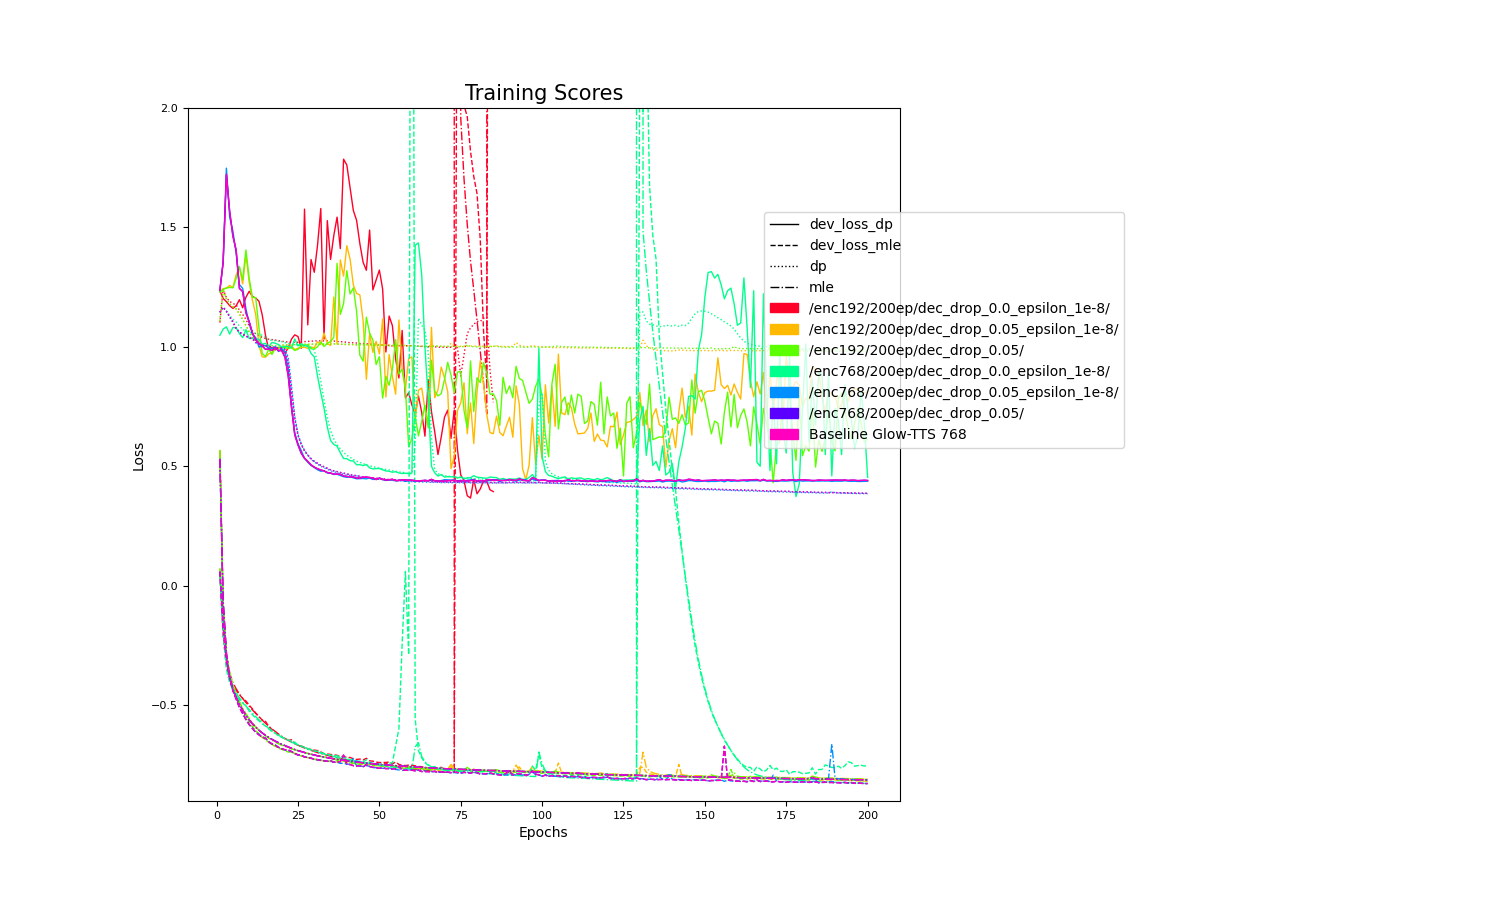

In [10]:
error_data = {}
labels = list(files.values())
for i, lr_file in enumerate(lr_files):
    data = get_epoch_data(lr_file, epoch=None)
    if data is None:
        continue
    p_e = 1
    print(f"{lr_file}: {p_e}")
    error_data_tmp = []
    for ep, ep_data in data.items():
        ep_data_error = ep_data.pop("error", {})
        error_data_tmp.append(ep_data)
        error_data_tmp[int(ep%p_e)-1].update(ep_data_error)
        if ep % p_e == 0:
            ep_data2 = pd.DataFrame(error_data_tmp).mean().to_dict()
            error_data[(labels[i], int(ep//p_e))] = ep_data2
            # error_data[(labels[i], int(ep//p_e))].update(ep_data_error)
            error_data_tmp = []
df = pd.DataFrame.from_dict(error_data, orient="index")
leg1 = plot_df(
    df,
    plot_lr=False,
    large_font=False,
    shrink_axes=0.6,
    ylim_max=2,
    ylim_min=-0.9,
    keys_exclude="devtrain|ctc|100ep|ed",
    # color_map="Set1",
    draggable=True
)

In [8]:
# error_data = {}
# labels = list(files.values())
# for i, lr_file in enumerate(lr_files):
#     data = get_epoch_data(lr_file, epoch=None)
#     if data is None:
#         continue
#     p_e = 1
#     print(f"{lr_file}: {p_e}")
#     error_data_tmp = []
#     for ep, ep_data in data.items():
#         ep_data_error = ep_data.pop("error", {})
#         error_data_tmp.append(ep_data)
#         error_data_tmp[int(ep % p_e) - 1].update(ep_data_error)
#         if ep % p_e == 0:
#             ep_data2 = pd.DataFrame(error_data_tmp).mean().to_dict()
#             error_data[(labels[i], int(ep // p_e))] = ep_data2
#             # error_data[(labels[i], int(ep//p_e))].update(ep_data_error)
#             error_data_tmp = []
# df = pd.DataFrame.from_dict(error_data, orient="index")
# leg2 = plot_df(
#     df,
#     plot_lr=False,
#     large_font=False,
#     shrink_axes=0.6,
#     ylim_max=0,
#     ylim_min=-19,
#     keys_exclude="devtrain|ctc|100ep|mle|dp",
#     # color_map="Set1",
#     draggable=True,
# )

In [9]:
# error_data = {}
# labels = list(files.values())
# for i, lr_file in enumerate(lr_files):
#     data = get_epoch_data(lr_file, epoch=None)
#     if data is None:
#         continue
#     p_e = 1
#     print(f"{lr_file}: {p_e}")
#     error_data_tmp = []
#     for ep, ep_data in data.items():
#         ep_data_error = ep_data.pop("error", {})
#         error_data_tmp.append(ep_data)
#         error_data_tmp[int(ep % p_e) - 1].update(ep_data_error)
#         if ep % p_e == 0:
#             ep_data2 = pd.DataFrame(error_data_tmp).mean().to_dict()
#             error_data[(labels[i], int(ep // p_e))] = ep_data2
#             # error_data[(labels[i], int(ep//p_e))].update(ep_data_error)
#             error_data_tmp = []
# df = pd.DataFrame.from_dict(error_data, orient="index")
# leg3 = plot_df(
#     df,
#     plot_lr=False,
#     large_font=False,
#     shrink_axes=0.6,
#     # ylim_max=0,
#     # ylim_min=-9,
#     keys_exclude="devtrain|ctc|100ep|mle|dp",
#     # color_map="Set1",
#     draggable=True,
# )